In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [ ]:
train_dataset = dsets.MNIST(root='./data',
              train=True,
              transform = transforms.ToTensor(),
              download=True)

test_dataset = dsets.MNIST(root='./data',
              train=False,
              transform = transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]


In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

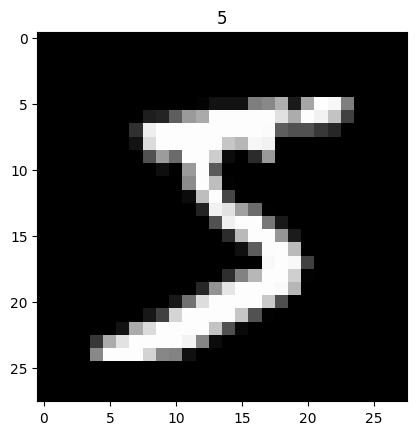

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0].numpy(), cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
input_size = 28*28
hidden_size = 500
num_classes = 10
num_epoch = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
import torch.utils.data as Data

In [ ]:
train_loader = Data.DataLoader(dataset=train_dataset,
                batch_size=batch_size,
                shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset,
                batch_size=batch_size,
                shuffle=False)

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out


In [ ]:
model = Model(input_size, hidden_size, num_classes)

In [ ]:
import torch.optim as opt
from torch.autograd import Variable

In [ ]:
loss_fin = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    images =  Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fin(outputs, labels)
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
     print("Epoch:%d, Batch:%d, Loss:%.4f"
     %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:0.2181
Epoch:1, Batch:200, Loss:0.2287
Epoch:1, Batch:300, Loss:0.1945
Epoch:1, Batch:400, Loss:0.2262
Epoch:1, Batch:500, Loss:0.2341
Epoch:1, Batch:600, Loss:0.1656
Epoch:2, Batch:100, Loss:0.1151
Epoch:2, Batch:200, Loss:0.0602
Epoch:2, Batch:300, Loss:0.0479
Epoch:2, Batch:400, Loss:0.1182
Epoch:2, Batch:500, Loss:0.0876
Epoch:2, Batch:600, Loss:0.1060
Epoch:3, Batch:100, Loss:0.0791
Epoch:3, Batch:200, Loss:0.0438
Epoch:3, Batch:300, Loss:0.0419
Epoch:3, Batch:400, Loss:0.1362
Epoch:3, Batch:500, Loss:0.0881
Epoch:3, Batch:600, Loss:0.0360
Epoch:4, Batch:100, Loss:0.0741
Epoch:4, Batch:200, Loss:0.0499
Epoch:4, Batch:300, Loss:0.0561
Epoch:4, Batch:400, Loss:0.0438
Epoch:4, Batch:500, Loss:0.0963
Epoch:4, Batch:600, Loss:0.0598
Epoch:5, Batch:100, Loss:0.0591
Epoch:5, Batch:200, Loss:0.0450
Epoch:5, Batch:300, Loss:0.0117
Epoch:5, Batch:400, Loss:0.0396
Epoch:5, Batch:500, Loss:0.0455
Epoch:5, Batch:600, Loss:0.0271


In [ ]:
import torch

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  outputs = model(images)
  _, pred = torch.max(outputs.data, 1)
  correct += (pred == labels).sum()
  total += labels.size(0)

print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))


Accuracy:97.550%


In [ ]:

for images, labels in test_loader:
  print(images.shape)
  break

torch.Size([100, 1, 28, 28])


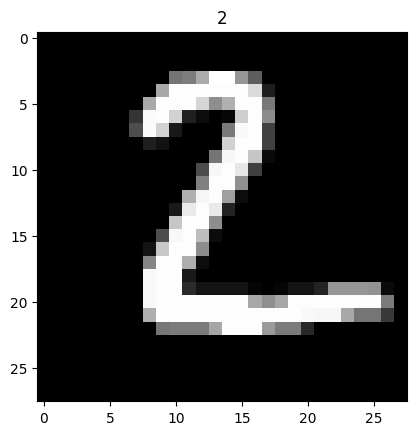

tensor([[ -5.2186,  -7.4369,  -1.9216,   0.0959, -11.2428,  -4.6656, -18.3772,
          11.3572,  -2.2310,  -1.9439],
        [ -7.6834,   2.9135,  10.5046,   2.3406, -18.9165,  -2.4793,  -6.9801,
         -13.6367,  -2.8157, -15.8133]], grad_fn=<AddmmBackward0>)
tensor([7, 2])


In [ ]:
plt.imshow(images[1][0], cmap='gray')
plt.title('%i' % labels[1])
plt.show()
images_flat = Variable(images[:2].view(-1, 28*28))
outputs = model(images_flat)
print(outputs)
_, pred_y = torch.max(outputs.data, -1)
print(pred_y)


In [ ]:
torch.save(model.state_dict(), 'model.pkl')

In [ ]:
model2 = Model(input_size, hidden_size, num_classes)
model2.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  outputs = model2(images)
  _, pred = torch.max(outputs.data, 1)
  correct += (pred == labels).sum()
  total += labels.size(0)

print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))


Accuracy:97.550%


In [ ]:
torch.save(model2, "model2.pkl")

In [ ]:
model3 = torch.load("model2.pkl", weights_only=False)

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  outputs = model3(images)
  _, pred = torch.max(outputs.data, 1)
  correct += (pred == labels).sum()
  total += labels.size(0)

print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))


Accuracy:97.550%


In [ ]:
model4 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)

In [ ]:
print(model)
print(model4)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
#optimizer = opt.SGD(model4.parameters(), lr=learning_rate, momentum=0.5)
#optimizer = opt.Adagradd(model4.parameters(), lr=learning_rate)
#optimizer = opt.Adagradd(model4.parameters(), lr=learning_rate)
optimizer = opt.Adam(model4.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    images =  Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = model4(images)
    loss = loss_fin(outputs, labels)
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
     print("Epoch:%d, Batch:%d, Loss:%.4f"
     %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:0.0260
Epoch:1, Batch:200, Loss:0.0180
Epoch:1, Batch:300, Loss:0.0105
Epoch:1, Batch:400, Loss:0.0193
Epoch:1, Batch:500, Loss:0.0450
Epoch:1, Batch:600, Loss:0.0350
Epoch:2, Batch:100, Loss:0.0141
Epoch:2, Batch:200, Loss:0.0334
Epoch:2, Batch:300, Loss:0.0450
Epoch:2, Batch:400, Loss:0.0615
Epoch:2, Batch:500, Loss:0.0149
Epoch:2, Batch:600, Loss:0.0290
Epoch:3, Batch:100, Loss:0.0309
Epoch:3, Batch:200, Loss:0.0165
Epoch:3, Batch:300, Loss:0.0140
Epoch:3, Batch:400, Loss:0.0585
Epoch:3, Batch:500, Loss:0.0092
Epoch:3, Batch:600, Loss:0.0136
Epoch:4, Batch:100, Loss:0.0190
Epoch:4, Batch:200, Loss:0.0057
Epoch:4, Batch:300, Loss:0.0119
Epoch:4, Batch:400, Loss:0.0073
Epoch:4, Batch:500, Loss:0.0135
Epoch:4, Batch:600, Loss:0.0245
Epoch:5, Batch:100, Loss:0.0417
Epoch:5, Batch:200, Loss:0.0152
Epoch:5, Batch:300, Loss:0.0129
Epoch:5, Batch:400, Loss:0.0139
Epoch:5, Batch:500, Loss:0.0696
Epoch:5, Batch:600, Loss:0.0078
